In [1]:
%pprint #use this to change print sye

Pretty printing has been turned OFF


In [2]:
import random

In [3]:
def return_type_n(file):
    import csv
    with open('reuc_100', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ') #, quotechar='|')
        for i, row in enumerate(reader):
            if i ==0:
                Type=row[0]
            elif i ==1:
                n=int(row[0])
            else:
                break
    return (Type,n)
            

In [4]:
def distmatrix(N):
    import csv
    DIST=[]
    with open('reuc_100', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ') #, quotechar='|')
        for i, row in enumerate(reader):
            if i >= 2+N:
                DIST.append(list(map(float, row)))
        return (DIST)
    return(999999999999999999)
            

In [5]:
def closest(D, n):
    closest = []
    for i in range(n):
        dlist = [[D[i][j] ,j] for j in range(n) if j != i]#generates a list of neighbours sorted with distance from i to j
        dlist.sort()
        closest.append(dlist)
    return closest

In [6]:
def length(tour,D,N):
    z = dist(tour[0][-1], tour[0][0],D)    # edge from last to first city of the tour
    z+=sum(tour[1])      # add length of edge from city i-1 to i
    return z


In [7]:
def is_in(j,LIST):
    for i in LIST:
        if j==i:
            return True
    return False

In [8]:
def return_nearest(i,A,unvisited):
    j=0
    #print(len(A))
    while j < len(A):
        c=A[i][j][1]
        if is_in(c,unvisited):
            return A[i][j]
        else:
            j+=1
    return[999]
    

In [9]:
def create_tour(D,i,N):
    unvisited=list(range(N))
    A=closest(D,N)
    length=[]
    prev=i
    Tour=[i]
    unvisited.remove(i)
    while unvisited!=[]:
        temp=return_nearest(prev,A,unvisited)
        next=temp[1]
        length.append(temp[0])
        Tour.append(next)
        unvisited.remove(next)
        prev=next
    cost=sum(length)
    cost=cost+D[next][i]
    return (Tour,cost)

In [10]:
def create_rand_tour(D,i,N):
    unvisited=list(range(N))
    length=[]
    prev=i
    Tour=[i]
    unvisited.remove(i)
    while unvisited!=[]:
        temp=random.choice(unvisited)
        next=temp
        Tour.append(next)
        unvisited.remove(next)
        prev=next
    rcost=cost(Tour,D)
    return (Tour,rcost)
    

In [11]:
def cost(Tour,D):#use only for GA created Tours with no added distance sum
    rcost=0
    lenght=len(Tour)
    for i in range(lenght-1):
        rcost=rcost+D[Tour[i]][Tour[i+1]]
        #print(rcost)
    rcost=rcost+D[Tour[lenght-1]][Tour[0]]
    return rcost

In [12]:
def sortsol(l):
    l.sort(key = lambda x: x[1])  
    return l

In [13]:
def fitness(sol):
    sum=0
    fitness_sum=0
    fitness=[]
    for i in range(len(sol)):
        fitness_sum=fitness_sum+(1/sol[i][1])**2
    for j in range(len(sol)):
        a=((1/(sol[j][1])**2)/(fitness_sum))
        fitness.append(a)
    return fitness
    

In [14]:
def mk_parent(sol,Fitness,bestsize):
    parents=[]
    #for i in range(bestsize):
        #parents.append(sol[i][0])
    psum=0
    i=0
    for i in range(0, len(sol)): #- bestsize):
        a=random.uniform(0,1)
        psum=0
        i=0
        while True:
            psum+=Fitness[i]
            if psum>=a:
                parents.append(sol[i][0])
                break
            i+=1
    return parents


In [15]:
def make_babies(parent1, parent2):
    child = []
    child_1 = []
    half1_1=[]
    half1_2=[]
    child_2 = []
    half2_1=[]
    half2_2=[]
    
    splicepoint1 = int(random.random() * len(parent1))
    splicepoint2 = int(random.random() * len(parent1))
    
    startsplice = min(splicepoint1, splicepoint2)
    endsplice = max(splicepoint1, splicepoint2)

    for i in range(startsplice, endsplice):
        half1_1.append(parent1[i])
        #print(parent2)
        half2_1.append(parent2[i])
        
    half1_2 = [j for j in parent2 if j not in half1_1]
    half2_2 = [j for j in parent1 if j not in half2_1]

    child_1 = half1_1+half1_2
    child_2 = half2_1+half2_2
    return [child_1,child_2]

In [16]:
def babies(parents, bestsize):
    children = []
    length = len(parents) - bestsize
    parentset = random.sample(parents, len(parents))

    #for i in range(0,bestsize):
        #children.append(parents[i])
    
    for i in range(0, length):
        child = make_babies(parentset[i], parentset[len(parents)-i-1])
        children.append(child[0])
        children.append(child[1])
    return children

In [17]:
def mutate(route,rate):
    i=int(random.random()*len(route))
    j=int(random.random()*len(route))
    input=route[:]
    if j>i:
        route=input[:i+1]+input[j-1:i:-1] + input[j:]
    elif i>j:
        route=input[:j+1]+input[i-1:j:-1] + input[i:]
            
    return route

In [18]:
def mutate1(route,rate):
    route1=route[:]#mutable list for repeated mutation of same elemet
    for i in range(len(route)):
        #if (random.uniform(0,1) < rate):
        if (random.random() < rate):
            j=int(random.random()*len(route))
            
            cityA=route[i]
            cityB=route[j]
            
            route1[i]=cityB
            route1[j]=cityA
    return route1

In [19]:
def make_sol(tempsol):
    A=[]
    costtemp=0
    for i in range(len(tempsol)):
        costtemp=cost(tempsol[i],D)
        A.append((tempsol[i],costtemp))
    return A

In [20]:
def mutate_children(children, rate):
    mutated=[]
    for i in range(len(children)):
        mutatedchild=mutate(children[i],rate)
        mutated.append(mutatedchild)
    return mutated


In [21]:
def genetic_algorithm(D,N,genrations,rate,bestsize=2):
    import random

    sol=[]
    solution=[]
    bestsize=2
    performance=[]
    for i in range(N):
        T=create_tour(D,i,N)
        sol.append(T)
        sol=sortsol(sol)
    solution=sol[:]
    performance.append((sol[0][1],0))
    
        
    for i in range(genrations):
        selected=solution[0:int(N/2)]
        R=fitness(selected)
        parents=mk_parent(selected,fitness(selected),bestsize)
        children=babies(parents,bestsize)
        solset=mutate_children(children,rate)    
        solution=make_sol(solset)
        for j in range(0,bestsize):
            solution.append(selected[j])
        solution=sortsol(solution)
        #print(solution)
        best=solution[0]
        performance.append((best[1],i))
        i+=1
    return (best,performance)
        
        

In [22]:
def genetic_algorithmr(D,N,genrations,rate,bestsize=2):
    import random

    sol=[]
    solution=[]
    bestsize=2
    performance=[]
    for i in range(N):
        T=create_rand_tour(D,i,N)
        sol.append(T)
        sol=sortsol(sol)
    solution=sol[:]
    performance.append((sol[0][1],0))
    
        
    for i in range(genrations):
        selected=solution[0:int(N/2)]
        R=fitness(selected)
        parents=mk_parent(selected,fitness(selected),bestsize)
        children=babies(parents,bestsize)
        solset=mutate_children(children,rate)
        solution=make_sol(solset)
        for j in range(0,bestsize):
            solution.append(selected[j])
        solution=sortsol(solution)
        #print(solution)
        best=solution[0]
        performance.append((best[1],i))
        i+=1
    return (best,performance)
        
        

In [38]:
N=return_type_n(1)[1]
D=distmatrix(N)
r=genetic_algorithm(D,N,1000,0.0)

In [39]:
r

(([18, 72, 15, 69, 64, 2, 51, 3, 96, 16, 99, 60, 81, 82, 73, 43, 65, 28, 12, 23, 98, 76, 34, 61, 79, 10, 4, 6, 8, 84, 39, 52, 35, 31, 54, 63, 90, 75, 30, 17, 62, 97, 22, 19, 78, 13, 46, 91, 36, 86, 33, 71, 68, 41, 67, 38, 44, 58, 88, 57, 45, 25, 48, 29, 92, 74, 85, 37, 11, 20, 47, 59, 49, 32, 9, 50, 27, 5, 53, 1, 42, 14, 77, 55, 66, 40, 94, 83, 24, 80, 21, 0, 7, 89, 56, 87, 70, 93, 26, 95], 1752.8105033090399), [(1752.8105033090399, 0), (1752.8105033090399, 0), (1752.8105033090399, 1), (1752.8105033090399, 2), (1752.8105033090399, 3), (1752.8105033090399, 4), (1752.8105033090399, 5), (1752.8105033090399, 6), (1752.8105033090399, 7), (1752.8105033090399, 8), (1752.8105033090399, 9), (1752.8105033090399, 10), (1752.8105033090399, 11), (1752.8105033090399, 12), (1752.8105033090399, 13), (1752.8105033090399, 14), (1752.8105033090399, 15), (1752.8105033090399, 16), (1752.8105033090399, 17), (1752.8105033090399, 18), (1752.8105033090399, 19), (1752.8105033090399, 20), (1752.8105033090399, 21

In [43]:
N=return_type_n('a')[1]
D=distmatrix(N)
ra=[]
for i in range(0,25,2):
    ra.append(genetic_algorithm(D,N,1000,i/100))

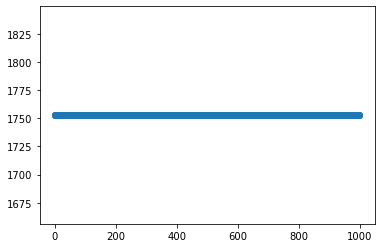

In [98]:
import matplotlib.pyplot as plt
>>> from math import log
>>> testList2 = [(elem1, elem2) for elem2, elem1 in ra[0][1]]
>>> zip(*testList2)
>>> plt.scatter(*zip(*testList2))
>>> plt.show()

In [80]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')
colors=['b', 'g','r','c', 'y', 'm', 'k','w','orange','sienna','tab:brown','tab:purple','slategrey']
for i in range(int(len(ra)-10)):
    testList2 = [(elem1, elem2) for elem2, elem1 in ra[i][1]]
    zip(*testList2)
    p=plt.scatter(*zip(*testList2),label=str(i*2/100),c=colors[i])
plt.xlabel('generations')
plt.ylabel('cost')
plt.title('')
plt.legend(title='Inversion Mutation rate ', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.show()

NameError: name 'ra' is not defined

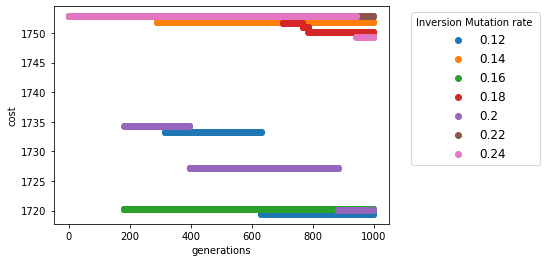

In [73]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('large')
for i in range(int(len(ra)/2),len(ra)):
    testList2 = [(elem1, elem2) for elem2, elem1 in ra[i][1]]
    zip(*testList2)
    p=plt.scatter(*zip(*testList2),label=str(i*2/100))
plt.xlabel('generations')
plt.ylabel('cost')
plt.title('')
plt.legend(title='Inversion Mutation rate ', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.show()

In [51]:
len(ra)

13

In [ ]:
ra[0]

In [ ]:
ra[1][0]

In [ ]:
a=mutate(list(range(20)),1)
b=mutate(list(range(20)),1)

In [ ]:
c=[]
for i in range(4):
    c.append(mutate(list(range(20)),1))

In [ ]:
T=create_tour(D,0,N)
T[0]

In [ ]:
mutate(T[0],1)

In [ ]:

print(A)
A.append(mutate1(T[0],1))
A

In [ ]:
c

In [ ]:
def make_sol1(tempsol):
    A=[]
    costtemp=0
    for i in range(len(tempsol)):
        costtemp=cost(tempsol[i],D)
        A.append((tempsol[i],costtemp))
    return A

In [ ]:
T[0]

In [ ]:
mutate(T[0],1)

In [ ]:
mutate1(T[0],1)

In [ ]:
T=create_tour(D,0,N)
A=[]
    
for i in range(N):
    A.append(mutate1(T[0],1))
sol=make_sol(A)
sol=sortsol(sol)
print(sol)

In [ ]:
A=[]
for i in range(2):
    A.append(sol[i][0])

In [ ]:
A

In [ ]:
def makepoints(a):
    import csv
    point=[]
    pointx=[]
    pointy=[]
    pointlabel=[]
    with open('reuc_100', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ') #, quotechar='|')
        for i, row in enumerate(reader):
            if i>1 and i<N+2:
                point.append((float(row[0]),float(row[1])))
                pointx.append(float(row[0]))
                pointy.append(float(row[1]))
                pointlabel.append(str(i))
    return(pointx,pointy,point,pointlabel)

In [ ]:
def make_pairs(tour):
    opa=[]
    for i in range(len(tour[0])-1):
        opa.append((tour[0][i],tour[0][i+1]))
    opa.append((tour[0][i+1],tour[0][0]))
    return opa

In [ ]:
import networkx as nx
import numpy as np


pos = makepoints('a')[2]#coordinates, (x, y) for 10 nodes
connect = make_pairs((ra[0])) #random connections
#print(connect)
#creation of the graph
graph = nx.Graph()
#adding nodes/connections in the graph
for node in range(len(pos)):
    graph.add_node(node)
graph.add_edges_from(connect)

#plot of the nodes using the (x,y) pairs as coordinates
nx.draw(graph, [(x,y) for x,y in pos], node_size=50)